### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/·Ñí·Ö°·Ü®·ÑÄ·Ö≠/2024-2/·ÑÄ·Öß·Üº·Ñå·Ö•·Üº·Ñá·ÖÆ·Ü´ ·ÑÉ·Öµ·Ñá·Ö¶·ÜØ·ÑÖ·Ö©·Ü∏/2019 ·Ñá·Ö¢·ÑÉ·Ö°·ÜØ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/pj_finaldata.csv")
df = df[['hour_time','humid_val','rain_val', 'temp_val', 'wind_val','day_cmj_mean', 'month', 'weekday', 'DI',
         'kr_cnt', 'snack_cnt', 'cafe_dessert_cnt','pork_jp_cnt', 'fish_cnt', 'chicken_cnt', 'pizza_cnt',
       'asian_western_cnt', 'cn_cnt', 'jokb_bos_cnt', 'steam_soup_cnt','dosirak_cnt', 'fast_cnt']]
df

hour_time  humid_val  rain_val  temp_val  wind_val  day_cmj_mean  month  \
0            18       84.0       0.0      24.6       1.2     17.666667      8   
1            16       89.0       0.0      24.1       1.9     18.750000      8   
2            15       79.0       0.0      22.1       0.9     18.708333      8   
3            16       80.0       0.0      21.7       0.8     18.708333      8   
4            10       69.0       0.5      23.6       3.6      9.647059      8   
...         ...        ...       ...       ...       ...           ...    ...   
4995         13       95.0       0.0      20.5       0.1     21.916667      6   
4996         10       79.0       0.0      21.7       2.5      6.583333      6   
4997         10       76.0       0.0      23.6       2.0     24.136364      6   
4998         13       87.0       3.0      20.0       1.9     24.136364      6   
4999         14       77.0       0.0      19.4       1.0      5.916667      6   

      weekday        DI  kr_cnt  ...  pork_jp_cnt  fish_cnt  chicken_cnt  \
0           2  74.67136       0  ...            0         0            0   
1           3  74.32851       0  ...            0         0            0   
2           4  70.18841       0  ...            0         0            0   
3           4  69.62340       0  ...            0         0            0   
4           5  71.67016       0  ...            0         0            0   
...       ...       ...     ...  ...          ...       ...          ...   
4995        3  68.60025       0  ...            0         0            0   
4996        4  69.55157       0  ...            0         0            0   
4997        1  72.30464       0  ...            0         0            0   
4998        1  67.28500       0  ...            0         0            0   
4999        2  65.79162       0  ...            0         0            0   

      pizza_cnt  asian_western_cnt  cn_cnt  jokb_bos_cnt  steam_soup_cnt  \
0             0                  0       0             5               0   
1             0                  0       0             1               0   
2             0                  0       0             2               0   
3             0                  0       0             5               0   
4             0                  0       0             5               0   
...         ...                ...     ...           ...             ...   
4995          0                  0       0             1               0   
4996          0                  0       0             1               0   
4997          0                  0       0             1               0   
4998          0                  0       0             1               0   
4999          0                  0       0             1               0   

      dosirak_cnt  fast_cnt  
0               0         0  
1               0         0  
2               0         0  
3               0         0  
4               0         0  
...           ...       ...  
4995            0         0  
4996            0         0  
4997            0         0  
4998            0         0  
4999            0         0  

[5000 rows x 22 columns]

In [ ]:
df.columns

Index(['hour_time', 'humid_val', 'rain_val', 'temp_val', 'wind_val',
       'day_cmj_mean', 'month', 'weekday', 'DI', 'kr_cnt', 'snack_cnt',
       'cafe_dessert_cnt', 'pork_jp_cnt', 'fish_cnt', 'chicken_cnt',
       'pizza_cnt', 'asian_western_cnt', 'cn_cnt', 'jokb_bos_cnt',
       'steam_soup_cnt', 'dosirak_cnt', 'fast_cnt'],
      dtype='object')

### Î≥ÄÏàò Î≥ÄÌôò Î∞è Ïä§ÏºÄÏùºÎßÅ

In [ ]:
# 1. Î™ÖÎ™©Ìòï Î≥ÄÏàò ÏßÄÏ†ï
df['hour_time'] = df['hour_time'].astype(str)
df['weekday'] = df['weekday'].astype(str)
df['month'] = df['month'].astype(str)

categorical_vars = df.select_dtypes(exclude=[np.number]).columns
df_categorical = df[categorical_vars]

In [ ]:
# 2. Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏßÄÏ†ï Î∞è Ïä§ÏºÄÏùºÎßÅ
continuous_vars = df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[continuous_vars]), columns=continuous_vars)

In [ ]:
# 3. Î™ÖÎ™©Ìòï Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ + Ïó∞ÏÜçÌòï Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞
df_preprocessed = pd.concat([df_scaled, df_categorical], axis=1)

### k-prototype Ïã§Ìñâ
- ÏÖÄ Ïã§Ìñâ ÏãúÍ∞ÑÏÉÅ ÏµúÏ†Å kÍ∞í Ï∞æÎäî ÏΩîÎìú ÏÉùÎûµ
- k=3ÏúºÎ°ú ÏßÑÌñâ

In [ ]:
k = 3
kproto = KPrototypes(n_clusters=k, init='Huang', random_state=123)
df_preprocessed['cluster'] = kproto.fit_predict(df_preprocessed, categorical=[df_preprocessed.columns.get_loc(col) for col in categorical_vars])

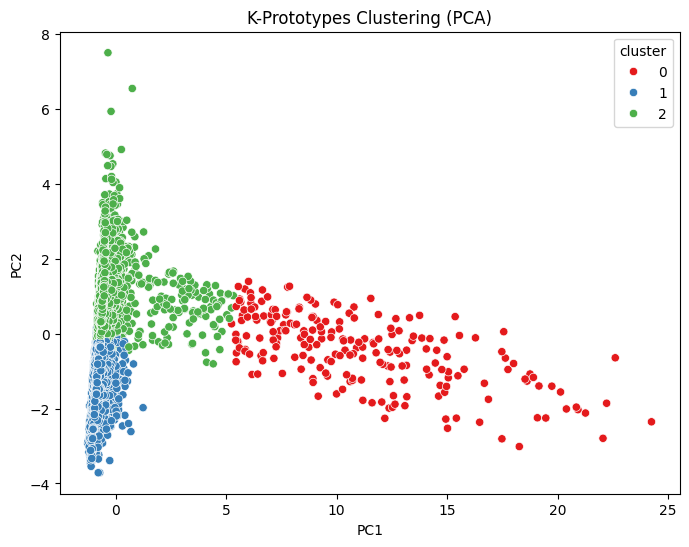

In [ ]:
# PCAÎ•º Ïù¥Ïö©Ìïú 2D ÏãúÍ∞ÅÌôî
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_preprocessed[continuous_vars])

df_preprocessed['PC1'] = pca_result[:, 0]
df_preprocessed['PC2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_preprocessed, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("K-Prototypes Clustering (PCA)")
plt.show()

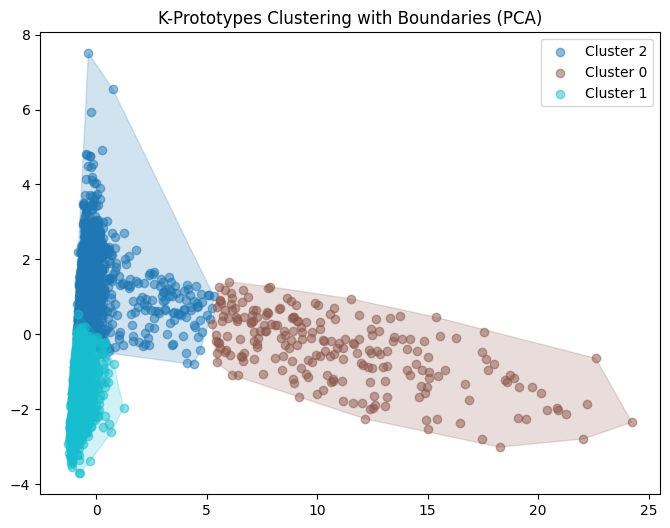

In [ ]:
# Convex HullÏùÑ Ï∞æÎäî Ìï®Ïàò
def find_hull(df):
    points = df[['PC1', 'PC2']].values
    hull = ConvexHull(points)
    return points[hull.vertices]

# Í≥†Ïú†Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÏóê ÎßûÍ≤å Ïª¨Îü¨Îßµ ÏÉùÏÑ±
num_clusters = df_preprocessed['cluster'].nunique()
cmap = plt.get_cmap("tab10", num_clusters)  # "tab10"ÏùÄ 10Í∞ÄÏßÄ ÏÉâÏùÑ Ï†úÍ≥µÌïòÎäî Ïª¨Îü¨Îßµ

plt.figure(figsize=(8, 6))

for i, cluster in enumerate(df_preprocessed['cluster'].unique()):
    subset = df_preprocessed[df_preprocessed['cluster'] == cluster]
    color = cmap(i)  # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï

    # Îç∞Ïù¥ÌÑ∞ Ï†ê ÌîåÎ°úÌåÖ
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', color=color, alpha=0.5)

    # Convex Hull Í∑∏Î¶¨Í∏∞
    hull_points = find_hull(subset)
    plt.fill(hull_points[:, 0], hull_points[:, 1], color=color, alpha=0.2)  # Í∞ôÏùÄ ÏÉâÏúºÎ°ú Ï±ÑÏö∞Í∏∞

plt.title("K-Prototypes Clustering with Boundaries (PCA)")
plt.legend()
plt.show()

In [ ]:
# ----- ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï© -----
df['cluster'] = df_preprocessed['cluster']

# ----- ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ -----
delivery_cluster0 = df[df['cluster'] == 0]
delivery_cluster1 = df[df['cluster'] == 1]
delivery_cluster2 = df[df['cluster'] == 2]

In [ ]:
delivery_cluster0

hour_time  humid_val  rain_val  temp_val  wind_val  day_cmj_mean month  \
31         11       64.0       0.0      24.3       1.0     14.739130     9   
32         12       70.0       0.0      23.7       1.6     14.739130     9   
33         13       73.0       0.0      23.1       0.5     14.739130     9   
37         17       78.0       0.0      21.4       1.1     14.739130     9   
38         18       77.0       0.0      21.0       0.8     14.739130     9   
..        ...        ...       ...       ...       ...           ...   ...   
354        22       66.0       0.0      13.8       0.0      9.041667    10   
355        23       64.0       0.0      14.5       0.8      9.041667    10   
356         0       62.0       0.0      15.1       0.0     13.416667    10   
357         1       62.0       0.0      15.8       1.5     13.416667    10   
358         2       57.0       0.0      16.7       1.4     13.416667    10   

    weekday        DI  kr_cnt  ...  fish_cnt  chicken_cnt  pizza_cnt  \
31        4  72.22748      27  ...         1            2          0   
32        4  71.91110      31  ...         0            4          1   
33        4  71.26637      20  ...         0            5          0   
37        4  69.00508      35  ...         7            8          2   
38        4  68.30730      34  ...        14           19          1   
..      ...       ...     ...  ...       ...          ...        ...   
354       3  57.05692      19  ...         8           10          5   
355       3  58.08020      16  ...         5           10          2   
356       4  58.93338      19  ...         1           12          1   
357       4  59.93004      14  ...         5            7          4   
358       4  61.09981      13  ...         3            2          1   

     asian_western_cnt  cn_cnt  jokb_bos_cnt  steam_soup_cnt  dosirak_cnt  \
31                   0       5             1               4            1   
32                   0       1             0               1            9   
33                   0       4             2               2            2   
37                   0       3             9               3            2   
38                   1       5             7               2            0   
..                 ...     ...           ...             ...          ...   
354                  5       2             8               5            0   
355                  3       3            11               5            0   
356                  1       1             9               3            0   
357                  5       1             4               2            0   
358                  1       0             5               4            0   

     fast_cnt  cluster  
31          1        0  
32          2        0  
33          0        0  
37          0        0  
38          1        0  
..        ...      ...  
354         0        0  
355         4        0  
356         1        0  
357         5        0  
358         2        0  

[219 rows x 23 columns]

In [ ]:
delivery_cluster1.describe()

humid_val     rain_val     temp_val     wind_val  day_cmj_mean  \
count  2134.000000  2134.000000  2134.000000  2134.000000   2134.000000   
mean     58.914672     0.032099     5.814574     1.302912     24.532070   
std      17.143865     0.284422     5.277560     0.985678     11.465335   
min      12.000000     0.000000    -9.600000     0.000000      3.652174   
25%      46.000000     0.000000     1.900000     0.500000     15.818182   
50%      58.000000     0.000000     5.800000     1.100000     23.275000   
75%      70.000000     0.000000     9.800000     1.900000     31.375000   
max      98.000000     7.500000    18.400000     6.000000     85.166667   

                DI       kr_cnt    snack_cnt  cafe_dessert_cnt  pork_jp_cnt  \
count  2134.000000  2134.000000  2134.000000       2134.000000  2134.000000   
mean     45.948196     0.151359     0.016401          1.220244     0.170572   
std       7.273988     0.427660     0.191750          3.058002     0.461307   
min      26.991200     0.000000     0.000000          0.000000     0.000000   
25%      40.686170     0.000000     0.000000          0.000000     0.000000   
50%      45.797070     0.000000     0.000000          0.000000     0.000000   
75%      51.617045     0.000000     0.000000          1.000000     0.000000   
max      62.848720     4.000000     5.000000         27.000000     4.000000   

          fish_cnt  chicken_cnt    pizza_cnt  asian_western_cnt  cn_cnt  \
count  2134.000000  2134.000000  2134.000000             2134.0  2134.0   
mean      0.119025     0.188379     0.061387                0.0     0.0   
std       0.483079     0.794458     0.294470                0.0     0.0   
min       0.000000     0.000000     0.000000                0.0     0.0   
25%       0.000000     0.000000     0.000000                0.0     0.0   
50%       0.000000     0.000000     0.000000                0.0     0.0   
75%       0.000000     0.000000     0.000000                0.0     0.0   
max       6.000000    12.000000     3.000000                0.0     0.0   

       jokb_bos_cnt  steam_soup_cnt  dosirak_cnt     fast_cnt  cluster  
count   2134.000000     2134.000000  2134.000000  2134.000000   2134.0  
mean       0.645267        0.031865     0.010309     0.029053      1.0  
std        1.024424        0.188553     0.125832     0.170764      0.0  
min        0.000000        0.000000     0.000000     0.000000      1.0  
25%        0.000000        0.000000     0.000000     0.000000      1.0  
50%        0.000000        0.000000     0.000000     0.000000      1.0  
75%        1.000000        0.000000     0.000000     0.000000      1.0  
max        9.000000        2.000000     3.000000     2.000000      1.0

In [ ]:
delivery_cluster2.describe()

humid_val     rain_val     temp_val     wind_val  day_cmj_mean  \
count  2647.000000  2647.000000  2647.000000  2647.000000   2647.000000   
mean     73.630530     0.193238    21.709105     1.205813     17.003501   
std      15.601362     1.240749     4.529469     0.878039      8.431243   
min      23.000000     0.000000     5.400000     0.000000      2.416667   
25%      63.000000     0.000000    18.650000     0.600000     10.833333   
50%      74.000000     0.000000    22.100000     1.000000     16.166667   
75%      86.000000     0.000000    25.100000     1.700000     22.000000   
max      98.000000    23.500000    33.700000     5.400000     58.208333   

                DI       kr_cnt    snack_cnt  cafe_dessert_cnt  pork_jp_cnt  \
count  2647.000000  2647.000000  2647.000000       2647.000000  2647.000000   
mean     69.150373     0.970533     0.126936          5.236872     0.182471   
std       7.048964     2.905263     0.730335         10.319984     0.563727   
min      42.078160     0.000000     0.000000          0.000000     0.000000   
25%      63.993920     0.000000     0.000000          0.000000     0.000000   
50%      69.774933     0.000000     0.000000          2.000000     0.000000   
75%      74.379290     1.000000     0.000000          6.000000     0.000000   
max      86.795082    25.000000    13.000000        156.000000     6.000000   

          fish_cnt  chicken_cnt    pizza_cnt  asian_western_cnt       cn_cnt  \
count  2647.000000  2647.000000  2647.000000        2647.000000  2647.000000   
mean      0.042690     0.324518     0.039290           0.048734     0.014356   
std       0.320723     0.886243     0.216404           0.334868     0.173286   
min       0.000000     0.000000     0.000000           0.000000     0.000000   
25%       0.000000     0.000000     0.000000           0.000000     0.000000   
50%       0.000000     0.000000     0.000000           0.000000     0.000000   
75%       0.000000     0.000000     0.000000           0.000000     0.000000   
max       8.000000     9.000000     3.000000           5.000000     4.000000   

       jokb_bos_cnt  steam_soup_cnt  dosirak_cnt    fast_cnt  cluster  
count   2647.000000     2647.000000  2647.000000  2647.00000   2647.0  
mean       0.527012        0.168115     0.030223     0.06989      2.0  
std        1.261353        0.612970     0.226363     0.39939      0.0  
min        0.000000        0.000000     0.000000     0.00000      2.0  
25%        0.000000        0.000000     0.000000     0.00000      2.0  
50%        0.000000        0.000000     0.000000     0.00000      2.0  
75%        0.000000        0.000000     0.000000     0.00000      2.0  
max       10.000000        6.000000     5.000000     6.00000      2.0

In [ ]:
import pandas as pd

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑†Í∞í Ï∂îÏ∂ú
mean0 = delivery_cluster0.describe().loc['mean']
mean1 = delivery_cluster1.describe().loc['mean']
mean2 = delivery_cluster2.describe().loc['mean']

# ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
mean_df = pd.DataFrame([mean0, mean1, mean2], index=['cluster0', 'cluster1', 'cluster2'])
mean_df

humid_val  rain_val   temp_val  wind_val  day_cmj_mean         DI  \
cluster0  75.041096  0.164384  19.733333  1.276256     15.795464  66.236622   
cluster1  58.914672  0.032099   5.814574  1.302912     24.532070  45.948196   
cluster2  73.630530  0.193238  21.709105  1.205813     17.003501  69.150373   

             kr_cnt  snack_cnt  cafe_dessert_cnt  pork_jp_cnt  fish_cnt  \
cluster0  23.502283   7.579909          3.716895     3.123288  6.328767   
cluster1   0.151359   0.016401          1.220244     0.170572  0.119025   
cluster2   0.970533   0.126936          5.236872     0.182471  0.042690   

          chicken_cnt  pizza_cnt  asian_western_cnt    cn_cnt  jokb_bos_cnt  \
cluster0    11.255708   1.963470           2.356164  3.438356      5.831050   
cluster1     0.188379   0.061387           0.000000  0.000000      0.645267   
cluster2     0.324518   0.039290           0.048734  0.014356      0.527012   

          steam_soup_cnt  dosirak_cnt  fast_cnt  cluster  
cluster0        2.936073     1.447489  1.296804      0.0  
cluster1        0.031865     0.010309  0.029053      1.0  
cluster2        0.168115     0.030223  0.069890      2.0

### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÌôïÏù∏

In [ ]:
# Íµ∞Ïßë Í≤∞Í≥º Ï∂îÍ∞Ä
df_clustered = df_preprocessed.copy()

# Íµ∞ÏßëÎ≥Ñ Ìñâ Í∞úÏàò Í≥ÑÏÇ∞
cluster_counts = df_clustered['cluster'].value_counts().rename_axis('cluster').reset_index(name='count')

# ÏàòÏπòÌòï Î≥ÄÏàò ÏöîÏïΩ (ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞® Ìè¨Ìï®)
numeric_summary = df_clustered.groupby("cluster").mean(numeric_only=True).reset_index()

# Î™ÖÎ™©Ìòï Î≥ÄÏàò ÏµúÎπàÍ∞í ÏöîÏïΩ
categorical_columns = df_clustered.select_dtypes(include=['object', 'category']).columns
mode_summary_df = df_clustered.groupby("cluster")[categorical_columns].agg(lambda x: x.mode()[0])

# ÏµúÏ¢Ö ÏöîÏïΩ DataFrame Í≤∞Ìï©
final_summary = pd.concat([numeric_summary.set_index("cluster"), mode_summary_df], axis=1)
final_summary = final_summary.merge(cluster_counts.set_index("cluster"), left_index=True, right_index=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("\nüîπ Íµ∞ÏßëÎ≥Ñ ÏàòÏπòÌòï Î∞è Î™ÖÎ™©Ìòï Î≥ÄÏàò ÏöîÏïΩ:")
final_summary


üîπ Íµ∞ÏßëÎ≥Ñ ÏàòÏπòÌòï Î∞è Î™ÖÎ™©Ìòï Î≥ÄÏàò ÏöîÏïΩ:


humid_val  rain_val  temp_val  wind_val  day_cmj_mean        DI  \
cluster                                                                    
0         0.428687  0.044074  0.533533  0.027740     -0.413874  0.530682   
1        -0.477425 -0.097495 -0.983688  0.056272      0.413871 -0.982226   
2         0.349430  0.074954  0.748903 -0.047661     -0.299419  0.747960   

           kr_cnt  snack_cnt  cafe_dessert_cnt  pork_jp_cnt  ...  \
cluster                                                      ...   
0        3.943014   3.316331          0.032482     3.095810  ...   
1       -0.262293  -0.180200         -0.278358    -0.149047  ...   
2       -0.114767  -0.129101          0.221724    -0.135971  ...   

         jokb_bos_cnt  steam_soup_cnt  dosirak_cnt  fast_cnt        PC1  \
cluster                                                                   
0            2.791987        3.251231     2.222815  2.329054  10.933658   
1           -0.091486       -0.239599    -0.119790 -0.150914  -0.769290   
2           -0.157240       -0.075828    -0.087331 -0.071029  -0.284400   

              PC2  hour_time  month  weekday  count  
cluster                                              
0       -0.429050          1     10        6    219  
1       -1.463390         15     11        2   2134  
2        1.215277         11      9        4   2647  

[3 rows x 25 columns]

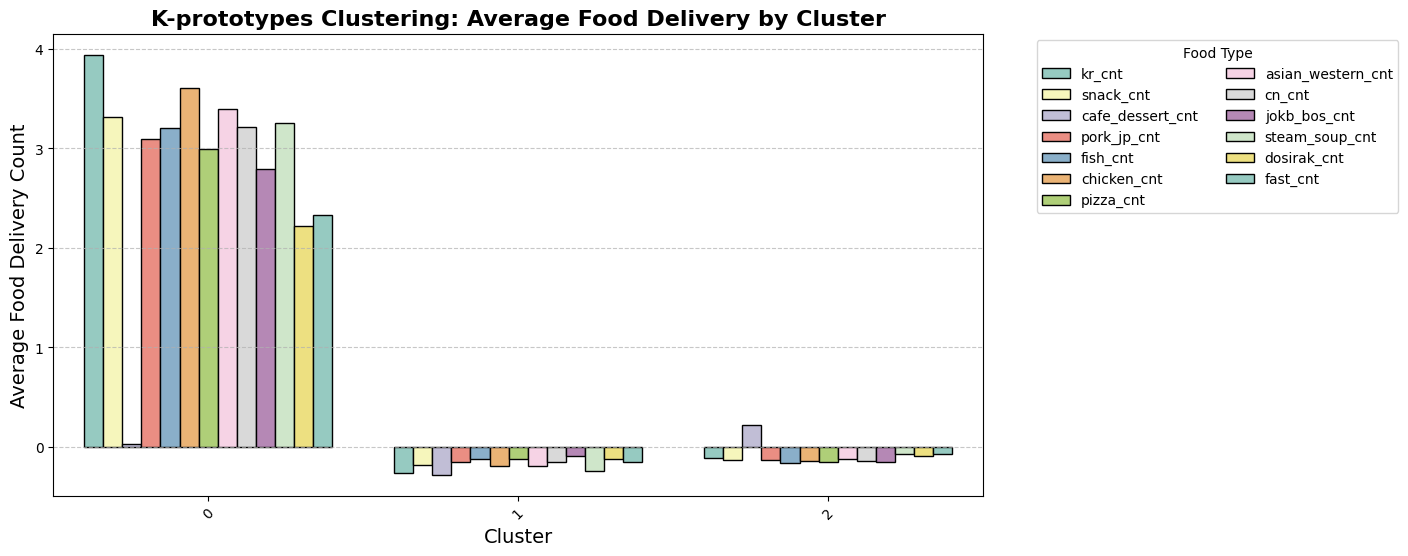

In [ ]:
# Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† ÏùåÏãù ÏÜåÎπÑÎüâ ÏöîÏïΩ (ÏùåÏãù Í¥ÄÎ†® Î≥ÄÏàòÎßå ÏÑ†ÌÉù)
food_columns = [col for col in df_clustered.columns if col.endswith('_cnt')]
cluster_summary = df_clustered.groupby('cluster')[food_columns].mean().reset_index()

# Long FormatÏúºÎ°ú Î≥ÄÌôò
cluster_summary_long = cluster_summary.melt(id_vars=['cluster'],
                                           var_name='Food_Type',
                                           value_name='Average_Count')

# Íµ∞ÏßëÎ≥Ñ ÏùåÏãù ÏÜåÎπÑ ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_summary_long, x='cluster', y='Average_Count', hue='Food_Type',
            palette='Set3', edgecolor='black')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title("K-prototypes Clustering: Average Food Delivery by Cluster", fontsize=16, fontweight='bold')
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Average Food Delivery Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Food Type', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax = plt.gca()

plt.show()

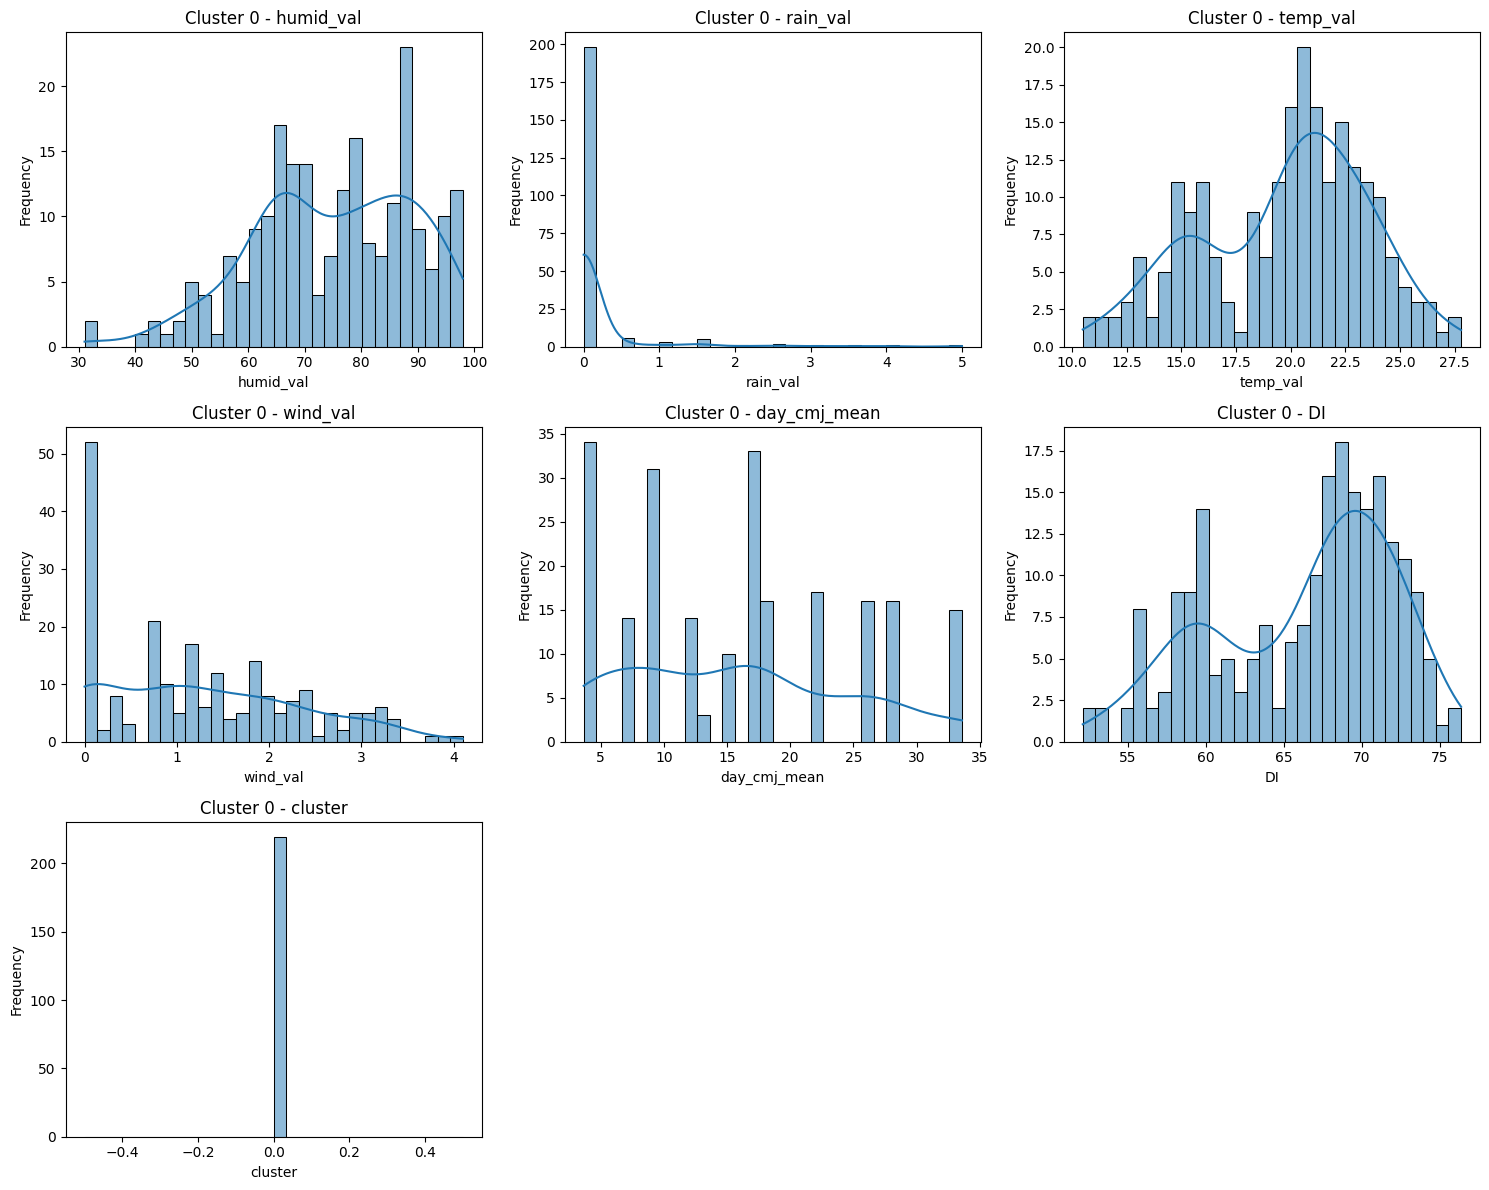

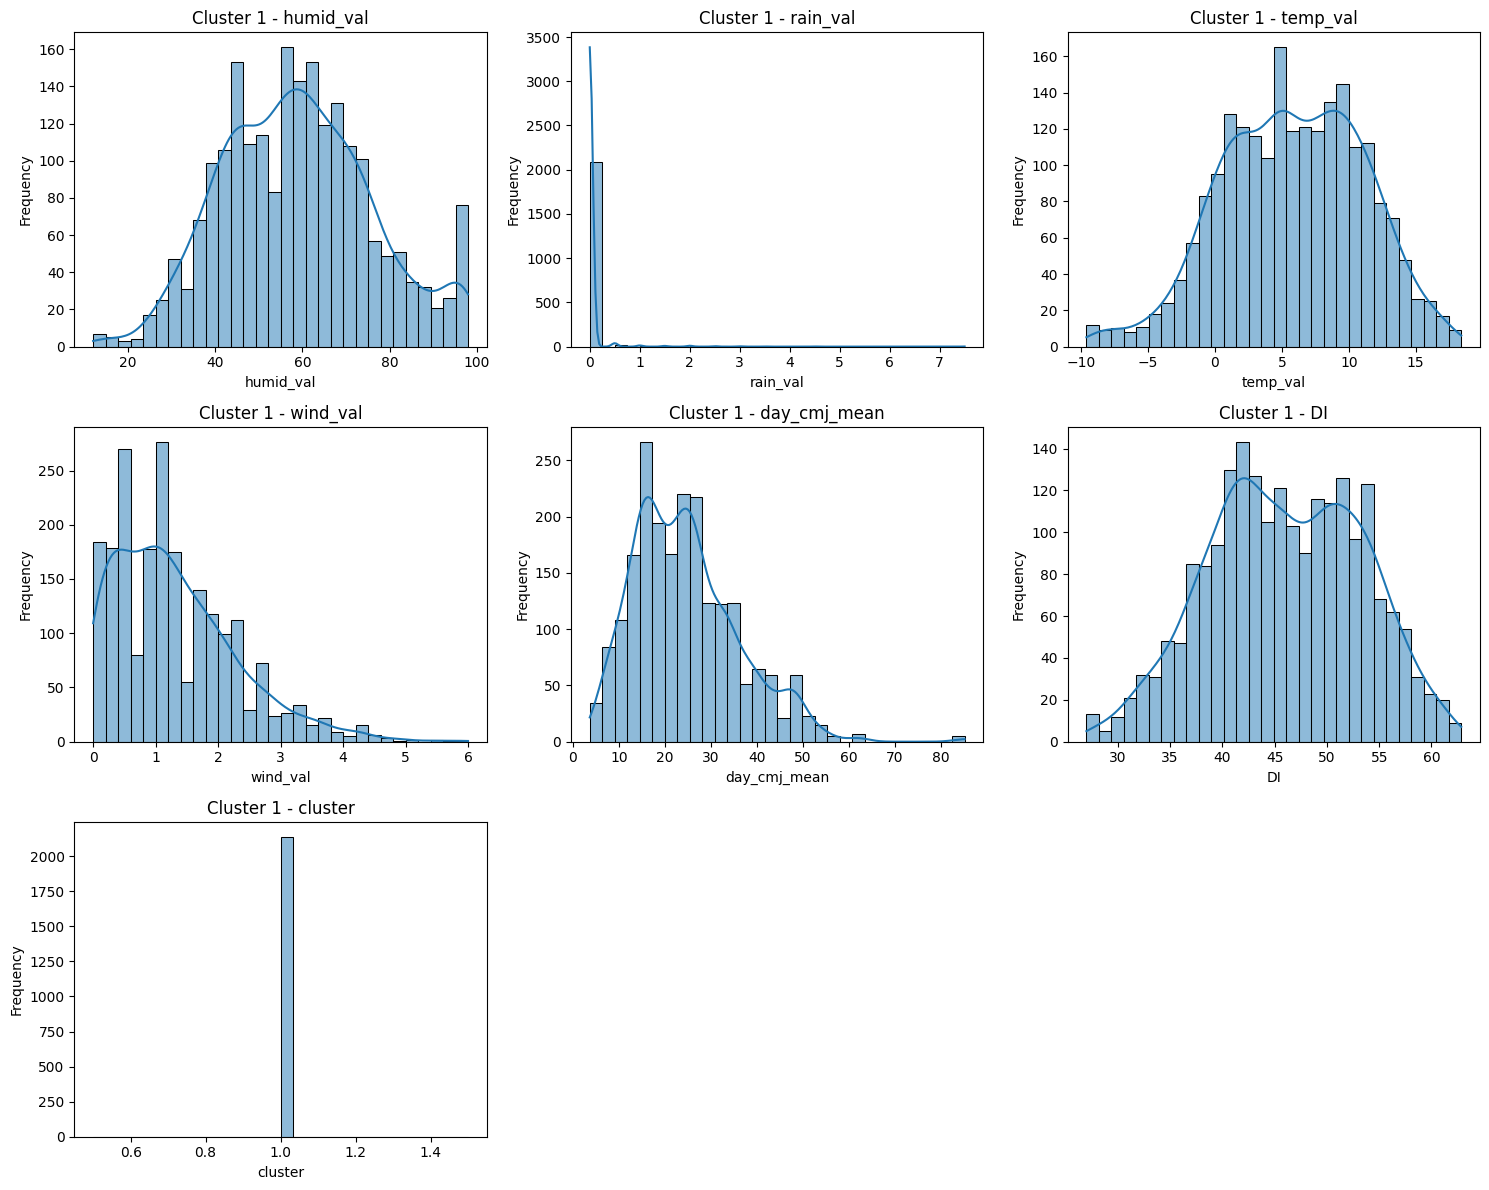

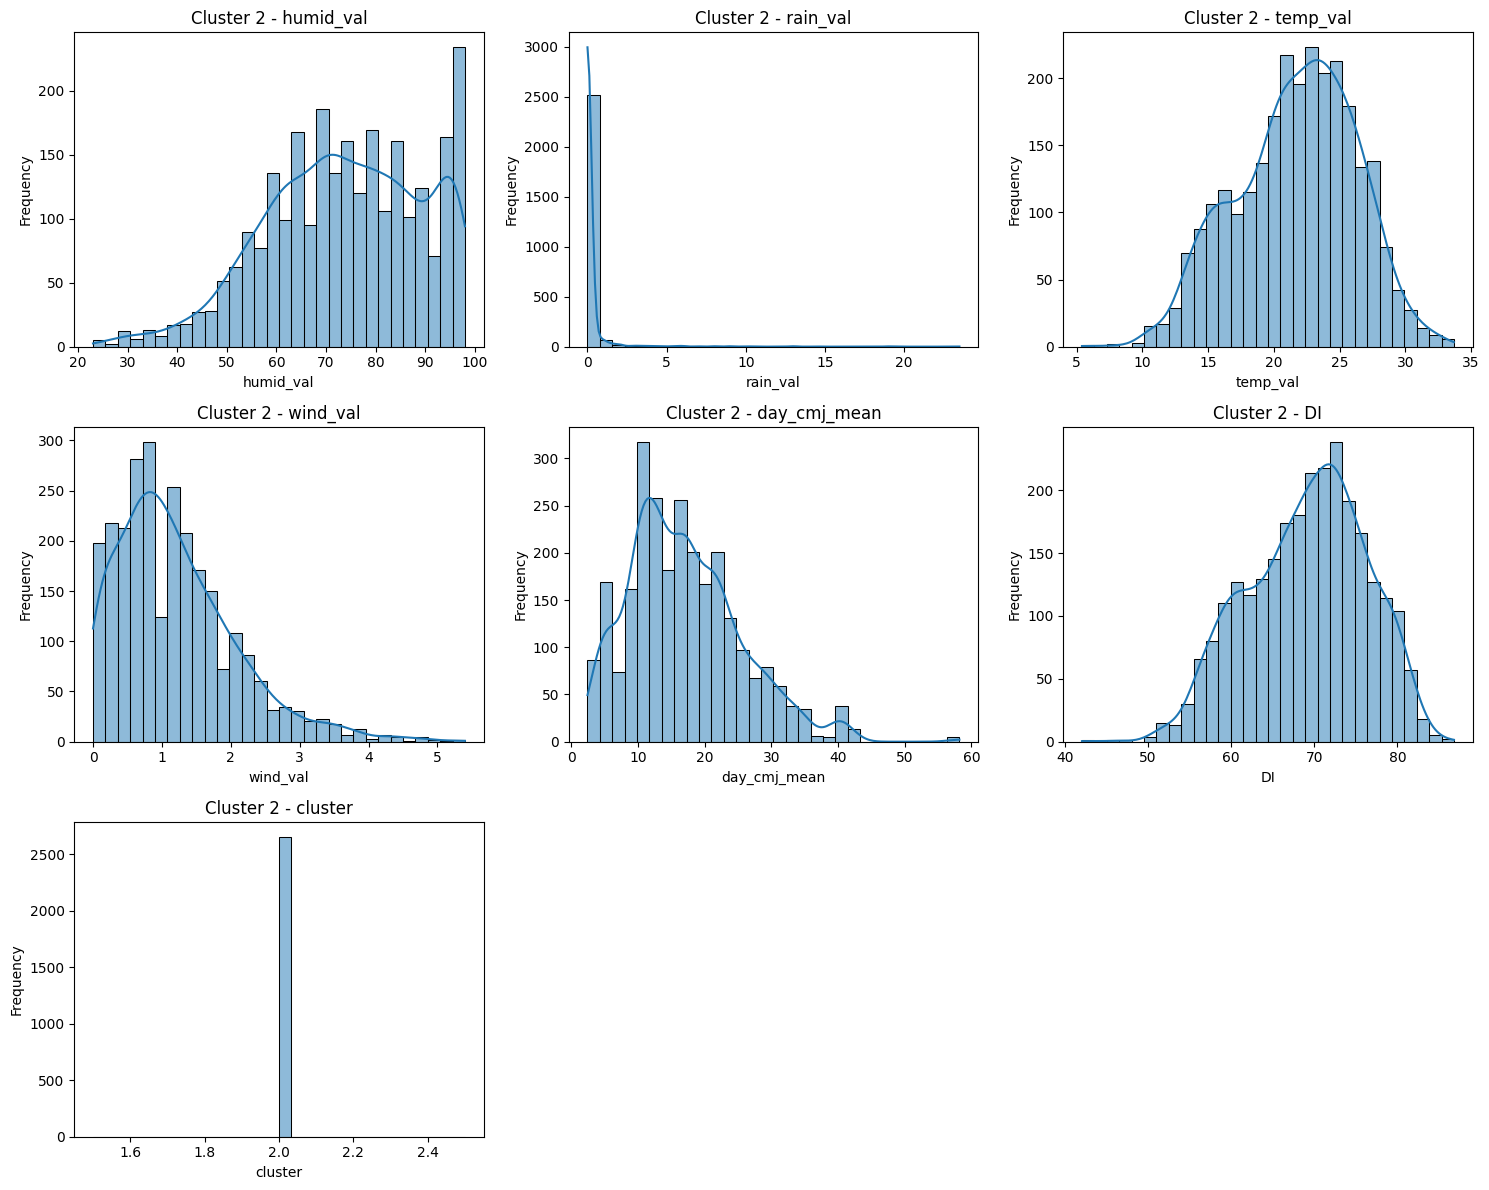

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î¶¨Ïä§Ìä∏ÏôÄ Ïù¥Î¶Ñ
clusters = [delivery_cluster0, delivery_cluster1, delivery_cluster2]
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
for df, name in zip(clusters, cluster_names):
    # ÏàòÏπòÌòï Ïª¨Îüº Ï§ëÏóêÏÑú 'cnt'Î°ú ÎÅùÎÇòÏßÄ ÏïäÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
    num_columns = [col for col in df.select_dtypes(include='number').columns if not col.endswith('cnt')]

    n_cols = 3
    n_rows = (len(num_columns) + n_cols - 1) // n_cols

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    for i, col in enumerate(num_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'{name} - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


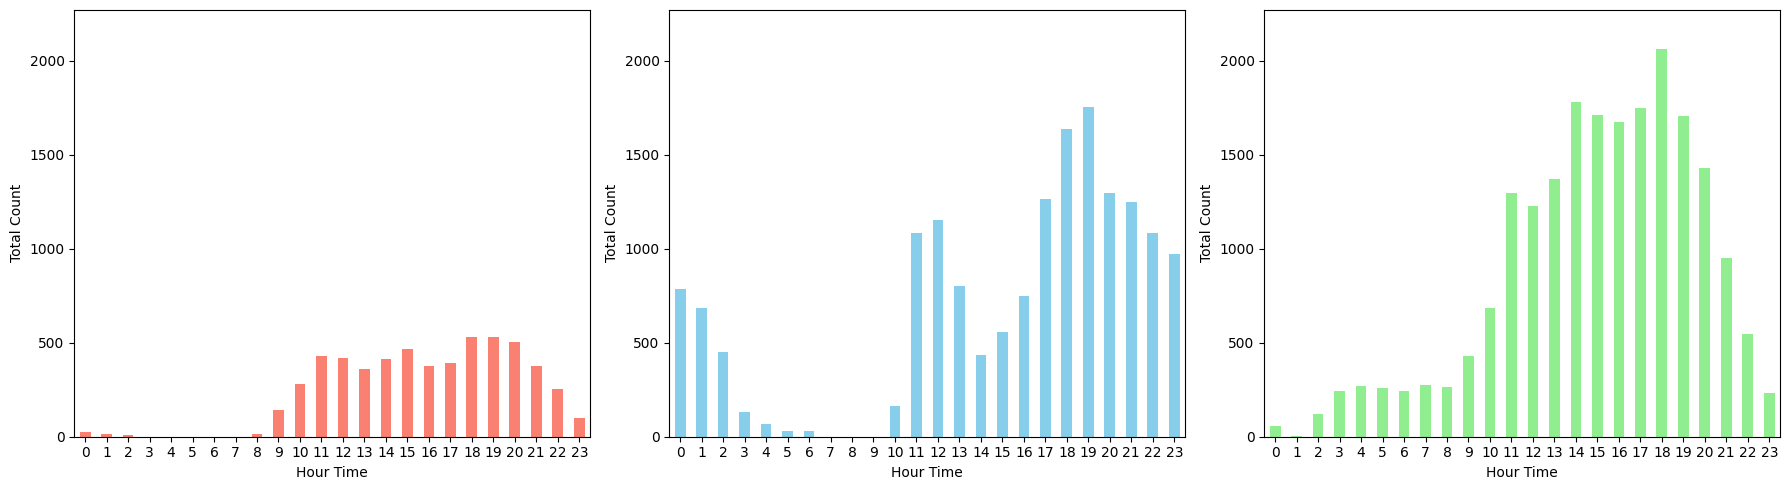

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ‚¨áÔ∏è ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Í≥º 1Ïùò ÏàúÏÑúÎ•º Î∞îÍøîÏÑú Í∑∏Î¶¥ Ï§ÄÎπÑ
cluster_dfs = [delivery_cluster1, delivery_cluster0, delivery_cluster2]  # ÏàúÏÑú: 1, 0, 2
cluster_labels = [1, 0, 2]  # Ïã§Ï†ú ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏
colors = ['salmon', 'skyblue', 'lightgreen']  # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÏÉâÏÉÅ
hour_range = list(range(24))

hour_sums = []  # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ hour_time Ï¥ùÌï© Ï†ÄÏû•

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ hour_sum Í≥ÑÏÇ∞
for i, cluster_df in enumerate(cluster_dfs):
    if cluster_df.empty or 'hour_time' not in cluster_df.columns:
        hour_sums.append(pd.Series([0]*24, index=hour_range))
        continue

    cluster_df = cluster_df.copy()
    cluster_df['hour_time'] = pd.to_numeric(cluster_df['hour_time'], errors='coerce').fillna(-1).astype(int)
    cluster_df = cluster_df[cluster_df['hour_time'].between(0, 23)]

    cnt_columns = [col for col in cluster_df.columns if col.endswith('_cnt')]

    if not cnt_columns:
        hour_sums.append(pd.Series([0]*24, index=hour_range))
        continue

    agg_df = cluster_df.groupby('hour_time')[cnt_columns].sum()
    hour_sum = agg_df.sum(axis=1).reindex(hour_range, fill_value=0)
    hour_sums.append(hour_sum)

# ‚¨áÔ∏è yÏ∂ï ÌÜµÏùºÏùÑ ÏúÑÌïú ÏµúÎåÄÍ∞í Í≥ÑÏÇ∞
all_values = pd.concat(hour_sums)
y_max = all_values.max() * 1.1  # ÏµúÎåÄÍ∞íÎ≥¥Îã§ 10% Ïó¨Ïú†
y_min = 0

# ‚¨áÔ∏è Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(18, 5))

for i, hour_sum in enumerate(hour_sums):
    plt.subplot(1, 3, i + 1)
    hour_sum.plot(kind='bar', color=colors[i])
    plt.xlabel('Hour Time')
    plt.ylabel('Total Count')
    plt.ylim(y_min, y_max)
    plt.xticks(rotation=0)
    plt.tight_layout()

# plt.suptitle('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏùåÏãù Î∞∞Îã¨ Ï£ºÎ¨∏ Ïàò', fontsize=16, y=1.05)
plt.show()